In [ ]:
import cv2
import numpy as np

alamat_file = '/content/vlcsnap-2020-11-29-08h44m14s441.png'
gambar = cv2.imread(alamat_file)
with open(alamat_file, 'rb') as f:
  gambar_string = np.array([f.read()])
  f.close()
width = gambar.shape[1]
height = gambar.shape[0]

In [ ]:
!git clone https://github.com/tensorflow/tpu/
# Ini bagian inisialisasi-nya, ndak usah dirubah-rubah ndak apa-apa


from IPython import display
from PIL import Image
import numpy as np
%tensorflow_version 1.x
import tensorflow as tf
import sys
sys.path.insert(0, 'tpu/models/official')
sys.path.insert(0, 'tpu/models/official/mask_rcnn')
import coco_metric
from mask_rcnn.object_detection import visualization_utils
ID_MAPPING = {
    1: 'orang',
    2: 'sepeda pancal',
    3: 'mobil',
    4: 'sepeda motor',
    5: 'pesawat terbang',
    6: 'bus',
    7: 'kereta',
    8: 'truk',
    9: 'perahu',
    10: 'bangjo',
    11: 'pemadam',
    13: 'rambu berhenti',
    14: 'meteran parkir',
    15: 'bangku',
    16: 'burung',
    17: 'kucing',
    18: 'anjing',
    19: 'kuda',
    20: 'domba',
    21: 'sapi',
    22: 'gajah',
    23: 'beruang',
    24: 'zebra',
    25: 'jerapah',
    27: 'ransel',
    28: 'payung',
    31: 'tas tangan',
    32: 'dasi',
    33: 'koper',
    34: 'frisbee',
    35: 'ski',
    36: 'papan luncur salju',
    37: 'bola',
    38: 'layang-layang',
    39: 'tongkat baseball',
    40: 'sarung tangan baseball',
    41: 'skateboard',
    42: 'papan selancar',
    43: 'raket tenis',
    44: 'botol',
    46: 'gelas anggur',
    47: 'cangkir',
    48: 'garpu',
    49: 'pisau',
    50: 'sendok',
    51: 'mangkuk',
    52: 'pisang',
    53: 'apel',
    54: 'sandwich',
    55: 'jeruk',
    56: 'brokoli',
    57: 'wortel',
    58: 'hot dog',
    59: 'pizza',
    60: 'donat',
    61: 'kue',
    62: 'kursi',
    63: 'sofa',
    64: 'tanaman pot',
    65: 'tempat tidur',
    67: 'meja makan',
    70: 'toilet',
    72: 'tv',
    73: 'laptop',
    74: 'mouse',
    75: 'remot',
    76: 'keyboard',
    77: 'hp',
    78: 'microwave',
    79: 'oven',
    80: 'pemanggang roti',
    81: 'bak cuci',
    82: 'kulkas',
    84: 'buku',
    85: 'jam',
    86: 'vas bunga',
    87: 'gunting',
    88: 'boneka beruang',
    89: 'pengering rambut',
    90: 'sikat gigi',
}
category_index = {k: {'id': k, 'name': ID_MAPPING[k]} for k in ID_MAPPING}

session = tf.Session(graph=tf.Graph())
saved_model_dir = 'gs://cloud-tpu-checkpoints/mask-rcnn/1555659850' 
_ = tf.saved_model.loader.load(session, ['serve'], saved_model_dir)

fatal: destination path 'tpu' already exists and is not an empty directory.


In [ ]:
def apaya(alamat):
  with open(alamat, 'rb') as f:
    gambar_string = np.array([f.read()])
    f.close()

  image = Image.open(alamat)
  width, height = image.size

  num_detections, detection_boxes, detection_classes, detection_scores, detection_masks, image_info = session.run(
      ['NumDetections:0', 'DetectionBoxes:0', 'DetectionClasses:0', 'DetectionScores:0', 'DetectionMasks:0', 'ImageInfo:0'],
      feed_dict={'Placeholder:0': gambar_string})

  # Capek juga nulis komentar
  # wkwkwkwk
  # Ini ndak perlu diutik-utik ga apa-apa, nanti kalau udah tingkat 4 di SC dibahas lagi deh ya
  num_detections = np.squeeze(num_detections.astype(np.int32), axis=(0,))
  detection_boxes = np.squeeze(detection_boxes * image_info[0, 2], axis=(0,))[0:num_detections]
  detection_scores = np.squeeze(detection_scores, axis=(0,))[0:num_detections]
  detection_classes = np.squeeze(detection_classes.astype(np.int32), axis=(0,))[0:num_detections]
  instance_masks = np.squeeze(detection_masks, axis=(0,))[0:num_detections]
  ymin, xmin, ymax, xmax = np.split(detection_boxes, 4, axis=-1)
  processed_boxes = np.concatenate([xmin, ymin, xmax - xmin, ymax - ymin], axis=-1)
  segmentations = coco_metric.generate_segmentation_from_masks(instance_masks, processed_boxes, height, width)


  detection_boxes = detection_boxes[detection_scores>0.25]
  instance_masks = instance_masks[detection_scores>0.25]
  segmentations = segmentations[detection_scores>0.25]
  detection_classes = detection_classes[detection_scores>0.25]
  detection_scores = detection_scores[detection_scores>0.25]


  detection_boxes = detection_boxes[detection_classes==1]
  detection_scores = detection_scores[detection_classes==1]
  instance_masks = instance_masks[detection_classes==1]
  segmentations = segmentations[detection_classes==1]
  detection_classes = detection_classes[detection_classes==1]

  if detection_boxes.shape[0] == 0:
    return detection_boxes, 0
  /'cv'''''''''''w2
  tinggi = abs(np.average(d[:,2]-d[:,0]))
  pengali = 170/tinggi
  Cx = (d[:,0]+d[:,2])//2
  Cy = (d[:,1]+d[:,3])//2
  cen_x = np.average(Cx)
  cen_y = np.average(Cy)

  jarak_rata2 = np.average(np.sqrt((Cx-cen_x)**2+(Cy-cen_y)**2))
  jarak_rata2 = jarak_rata2*pengali//100
  
  return detection_boxes, jarak_rata2

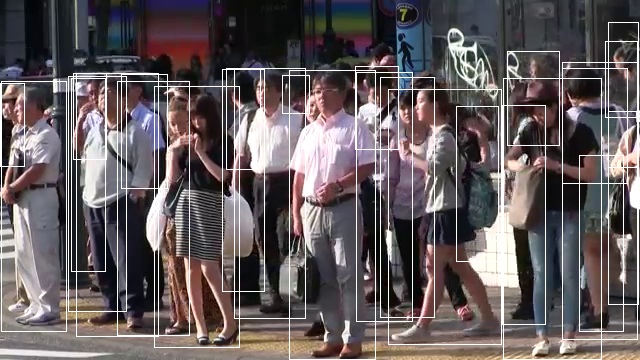

In [ ]:
from google.colab.patches import cv2_imshow

d = detection_boxes.astype(int)
for kotak in d :
  cv2.rectangle(gambar, (kotak[1], kotak[0]), (kotak[3], kotak[2]), (255,255,255), 1)
cv2_imshow(gambar)
print (jarak_rata2)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob
list_gambar = glob.glob("/content/drive/MyDrive/Banana Lassi/Fadhilah/Ini/*.jpg")
for citra in list_gambar:
  d,r = apaya(citra)
  print (citra, ':', r)

/content/drive/MyDrive/Banana Lassi/Fadhilah/Ini/0.jpg : 6.0
/content/drive/MyDrive/Banana Lassi/Fadhilah/Ini/6.jpg : 9.0
/content/drive/MyDrive/Banana Lassi/Fadhilah/Ini/12.jpg : 6.0
/content/drive/MyDrive/Banana Lassi/Fadhilah/Ini/18.jpg : 5.0
/content/drive/MyDrive/Banana Lassi/Fadhilah/Ini/24.jpg : 7.0
/content/drive/MyDrive/Banana Lassi/Fadhilah/Ini/30.jpg : 7.0
/content/drive/MyDrive/Banana Lassi/Fadhilah/Ini/36.jpg : 6.0
/content/drive/MyDrive/Banana Lassi/Fadhilah/Ini/42.jpg : 5.0
/content/drive/MyDrive/Banana Lassi/Fadhilah/Ini/48.jpg : 7.0
/content/drive/MyDrive/Banana Lassi/Fadhilah/Ini/54.jpg : 6.0
/content/drive/MyDrive/Banana Lassi/Fadhilah/Ini/60.jpg : 6.0
/content/drive/MyDrive/Banana Lassi/Fadhilah/Ini/66.jpg : 5.0
/content/drive/MyDrive/Banana Lassi/Fadhilah/Ini/72.jpg : 6.0
/content/drive/MyDrive/Banana Lassi/Fadhilah/Ini/78.jpg : 6.0
/content/drive/MyDrive/Banana Lassi/Fadhilah/Ini/84.jpg : 6.0
